In [102]:
#county-carbon footprint

#HENRY & JUN
# !pip install ipynb
#!pip install sklearn
#!pip install mlxtend
import ipynb.fs.full.general_model_pipeline_vl


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Importing the Data

You can check the process of merging the two datasets [HERE](../eda/JonesKammen_with_CoolClimate.ipynb) 

In [108]:
data = pd.read_csv("../../data/jonesKammen-PlUS-CoolClimate.csv")
data.head()

,CountyName,num_vehicles,miles_traveled_year,num_short_flights,num_med_flights,num_long_flights,electricity_billPerYear,housing_squarefeet,moneySpentOnClothesPerYear,result_grand_total,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,popden,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,HouseholdsPerZipCode
0,ALAMEDA,242.0,1613500.0,483.0,126.0,89.0,97190.0,211948.5,40510.762336,5277.395845,1333498,111.87,13884600,2590891,258994.046896,275913.455348,1.768720e+06,22.368750,983886,505952
1,ALPINE,15.0,86300.0,27.0,8.0,3.0,5440.0,14048.0,2366.563071,295.877796,1071,6.22,1177601,84191,5.789275,11596.212856,5.219063e+04,28.795106,34414,1002
2,AMADOR,87.0,700100.0,162.0,39.0,27.0,37630.0,71966.0,14149.849255,2018.848980,35248,24.21,1578400,442394,2747.175496,68394.867629,2.955696e+05,14.518174,284242,15061
3,ANDERSON,18.0,170100.0,23.0,15.0,3.0,12330.0,20055.0,2377.138345,426.297154,56985,12.88,302700,164792,217.132534,56492.456566,1.269573e+05,4.450502,128037,19401
4,ANDREWS,11.0,60700.0,3.0,1.0,6.0,5610.0,7993.0,1319.917126,221.874511,12985,2.81,42500,34086,12.306216,11292.014844,3.320776e+04,0.000000,26524,5391


# Test and Train Splitting

We split our data into train and test data (80/20) and use a random seed of 100 for reproducibility.

In [109]:
# set the seed for reproducibility
rs = 100
np.random.seed(100)

# frac train
train_size = 0.8

In [110]:
train_data = data.sample(frac=train_size)
test_data = data[data['CountyName'].apply(lambda x: x not in train_data['CountyName'].values)]
train_data.drop(columns='CountyName', inplace=True)
test_data.drop(columns='CountyName', inplace=True)

/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
train_data.shape, test_data.shape

((240, 19), (60, 19))

## Forecasting and Prediction Modeling (25 points)

In this section, we fit five machine learning models:
- Simple Linear Regression
- Ridge Regression
- LASSO Regression
- Decision Tree
- Random Forest


### Prediction Model 1: Linear Regression

Splitting data...
Fitting Model...
[Train MSE: 193.2402]
[Train R^2: 0.9999553426419794]
[Test MSE: 57765.674]
[Test R^2: 0.998128631686071]
----FINISHED----


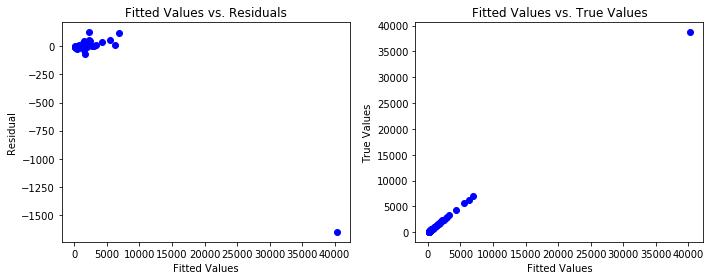

In [124]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'result_grand_total')

lr_model = LinearRegression()
lr_model = gmp.run_model(X_train, X_val, y_train, y_val, lr_model, diagnostics=True)

In [128]:
conversion_rates = pd.DataFrame(lr_model.coef_, train_data.columns[:-1], columns=['Model Coefs'])

conversion_rates

,Model Coefs
num_vehicles,11.914166
miles_traveled_year,0.001105
num_short_flights,0.573165
num_med_flights,1.871119
num_long_flights,4.847888
electricity_billPerYear,0.004340
housing_squarefeet,-0.007290
moneySpentOnClothesPerYear,0.018085
result_grand_total,0.000130
Population,0.064418


### Prediction Model 2: Ridge Regression

In [125]:
columns_to_standardize = list(train_data.columns)[0:8] + list(train_data.columns)[9:]

In [126]:
X_train, X_val, y_val, y_val = gmp.preprocess_data(train_data, 'result_grand_total', standardize_cols = columns_to_standardize)

alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100]
gmp.linreg_kfold_cv(RidgeCV, X_train, X_val, y_train, y_val, alphas)

Standardizing data...
Splitting data...
optimal alpha: 0.0
Test MSE with cross-validated RidgeCV: 57765.67395607755
[R^2: 0.9981286316860748]


/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.0

### Prediction Model 3: Lasso Regression

In [127]:
X_train, X_val, y_val, y_val = gmp.preprocess_data(train_data, 'result_grand_total', standardize_cols = columns_to_standardize)

alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100]
gmp.linreg_kfold_cv(LassoCV, X_train, X_val, y_train, y_val, alphas)

Standardizing data...
Splitting data...
optimal alpha: 0.0
Test MSE with cross-validated LassoCV: 8627.698263580554
[R^2: 0.9997204983505456]


/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mode

0.0

### Prediction Model 4: Decision Tree

In [119]:
param_dist = {'max_leaf_nodes': np.arange(2, 27),
              'max_features': np.arange(2, X_train.shape[1] + 1),
              'max_depth': np.arange(2,12)}

tree = DecisionTreeRegressor(random_state = rs, max_depth = 4, max_features=5, max_leaf_nodes=10)
gmp.tree_kfold_cv(tree, param_dist, X_train, y_train, n_iter=1000, random_state = rs)

0.9304583830269849
{'max_leaf_nodes': 26, 'max_features': 2, 'max_depth': 9}


/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Splitting data...
Fitting Model...
[Train MSE: 20662.7114]
[Train R^2: 0.9952248964928301]
[Test MSE: 8994013.5835]
[Test R^2: 0.7086312530861629]
----FINISHED----


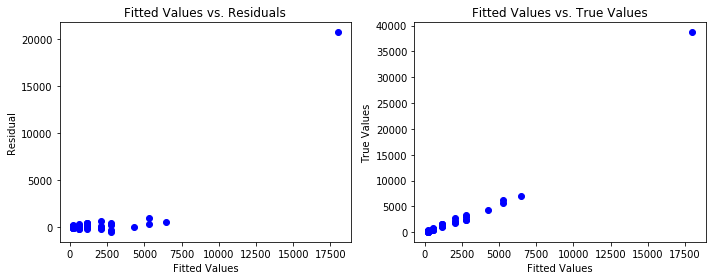

In [121]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'result_grand_total')

tree_model = DecisionTreeRegressor(random_state=rs, max_depth=4)
tree_model = gmp.run_model(X_train, X_val, y_train, y_val, tree_model, diagnostics=True)

### Prediction Model 5: Random Forest

Fitting Model...
[Train MSE: 59747.4544]
[Train R^2: 0.9861925052708329]
[Test MSE: 12384707.524]
[Test R^2: 0.5987868287432065]
----FINISHED----


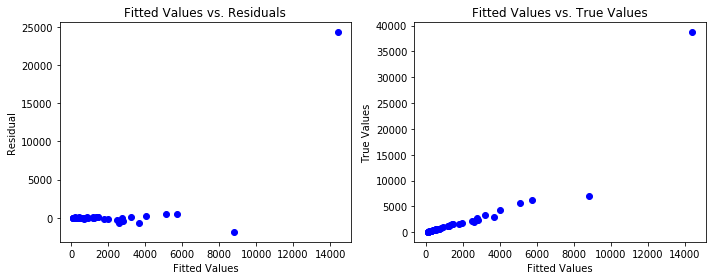

In [120]:
forest_model = RandomForestRegressor(n_estimators = 500, random_state = rs, max_depth = 5)
forest_model = gmp.run_model(X_train, X_val, y_train, y_val, forest_model, diagnostics=True)

In [132]:
X_test = test_data.drop(columns='result_grand_total')
y_test = test_data['result_grand_total']


lr_test_preds = lr_model.predict(X_test)
tree_test_preds = tree_model.predict(X_test)
forest_test_preds = forest_model.predict(X_test)


{'Linear Regression' : mean_squared_error(lr_test_preds, y_test),
 'Decision Tree' : mean_squared_error(tree_test_preds, y_test),
 'Random Forest' : mean_squared_error(forest_test_preds, y_test)}

{'Linear Regression': 7951.847701035857,
 'Decision Tree': 501176.82455503184,
 'Random Forest': 169341233.80367383}

## Interpretation and Conclusions (20 points)

The motivation for this model was to predict a county’s carbon footprint based on combined features from the Jones-Kammen dataset and the data from the CoolClimateAPI. According to our models above, the linear regression seemed to do the best in terms of Test’s Mean squared Error. 

Looking at all of the linear model’s coefficients, we note that the number of vehicles someone owns has a large beta coefficient. While we cannot suggest a causal relationship, we can suggest that there is a strong correlation between the number of vehicles someone owns to their carbon emissions. Therefore, one conclusion that we suggest is that it behooves policymakers to consider the impact that a strong public transportation system has on people and the environment. 

One caveat with this suggestion, however, is that it does not account for the type of vehicle (i.e. combustion vs electric vs hybrid) that the people in that county have. This was because when we pulled this data from the API, some of the features that we had wanted to use (fuel type, meat & egg consumption) were defaulted to certain values. 

Our models are interesting and could be useful for predicting which counties might have large carbon footprint for policy applications. For example, for which counties might it be beneficial to run recycling or resource-conservation education campaigns. Knowing these results, we know which counties to really target and know which features they should be aware of. This can help lower the overal carbon footprint emitted.

When we tested our models, we found it very interesting that LASSO did worse than linear regression, in terms of MSE. We thought lasso should do at least better than the linear regression, so these results were a bit shocking. There could have been a bug in our model pipeline code. Another note is that when we ran cross validation on both lasso and ridge, we got the optimal alpha value of 0, which is just linear regression. This shows that lasso and Ridge were not useful, and we should stick to the linear regression. Our decision trees and random forests do pretty poorly compared to the linear models, as they could not replicate the linear decision boundary. Our MSE values for the decision trees and random forests were massive, which was a bit concerning. 
